# Multivariate Analysis

**Purpose:** Study relationships between multiple variables together

**Why:** Medical conditions depend on multiple factors:
- Diabetes: glucose + age + weight + family history
- Heart disease: BP + cholesterol + BMI + smoking

**Tasks:**
- Correlation analysis
- Feature interactions
- Dimensionality reduction (PCA, t-SNE)
- Patient clustering

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Load Dataset

In [2]:
conn = sqlite3.connect('../databases/nhanes_1st.db')
df = pd.read_sql_query('SELECT * FROM raw_dataset', conn)
conn.close()

print(f'\u202aDataset shape: {df.shape}')

‪Dataset shape: (34097, 29)


## 1. Correlation Analysis

Which features are related to each other?

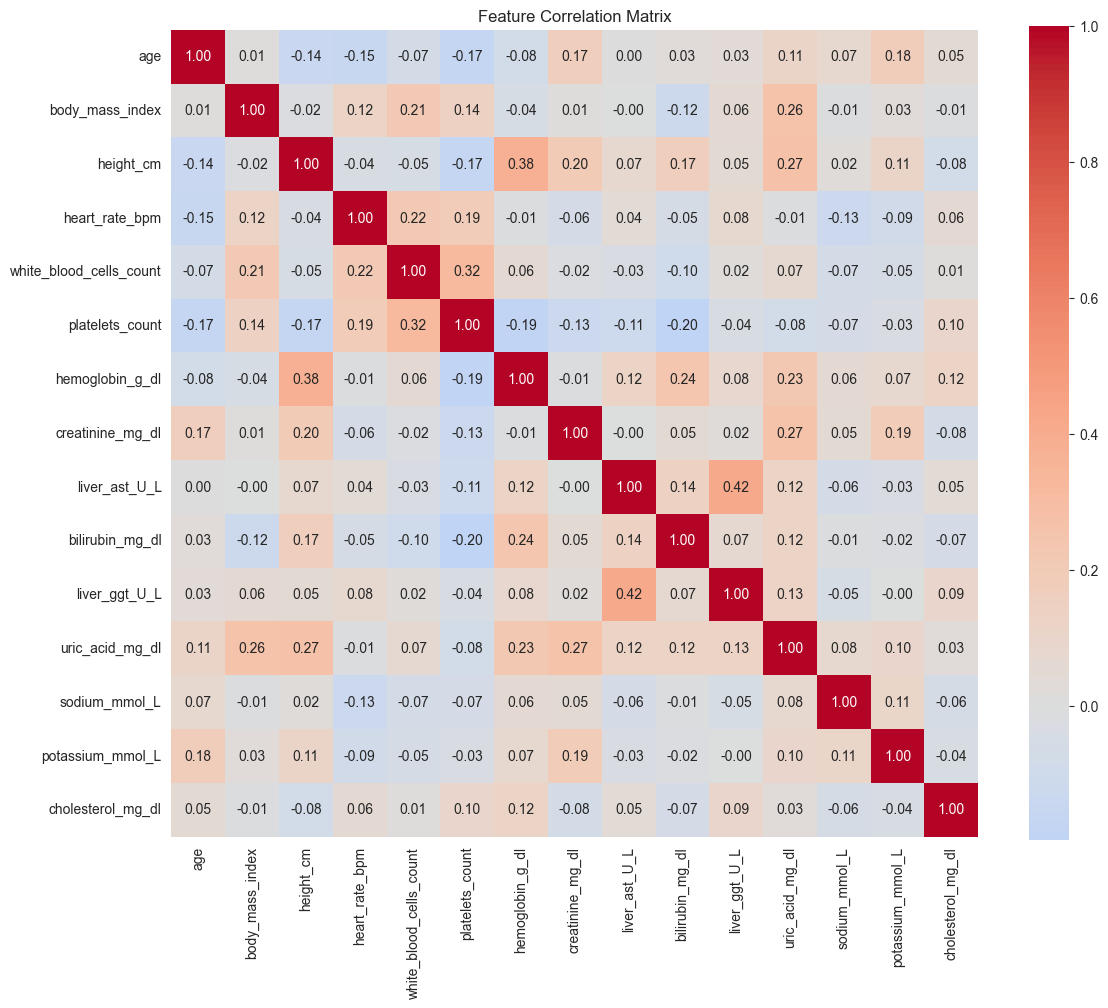

In [3]:
# Select continuous features
continuous_cols = [
    'age', 'body_mass_index', 'height_cm', 'heart_rate_bpm',
    'white_blood_cells_count', 'platelets_count', 'hemoglobin_g_dl',
    'creatinine_mg_dl', 'liver_ast_U_L', 'bilirubin_mg_dl', 'liver_ggt_U_L',
    'uric_acid_mg_dl', 'sodium_mmol_L', 'potassium_mmol_L', 'cholesterol_mg_dl'
]

# Calculate correlation matrix
corr_matrix = df[continuous_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 2. Feature Interactions

Does age amplify the effect of high blood pressure?

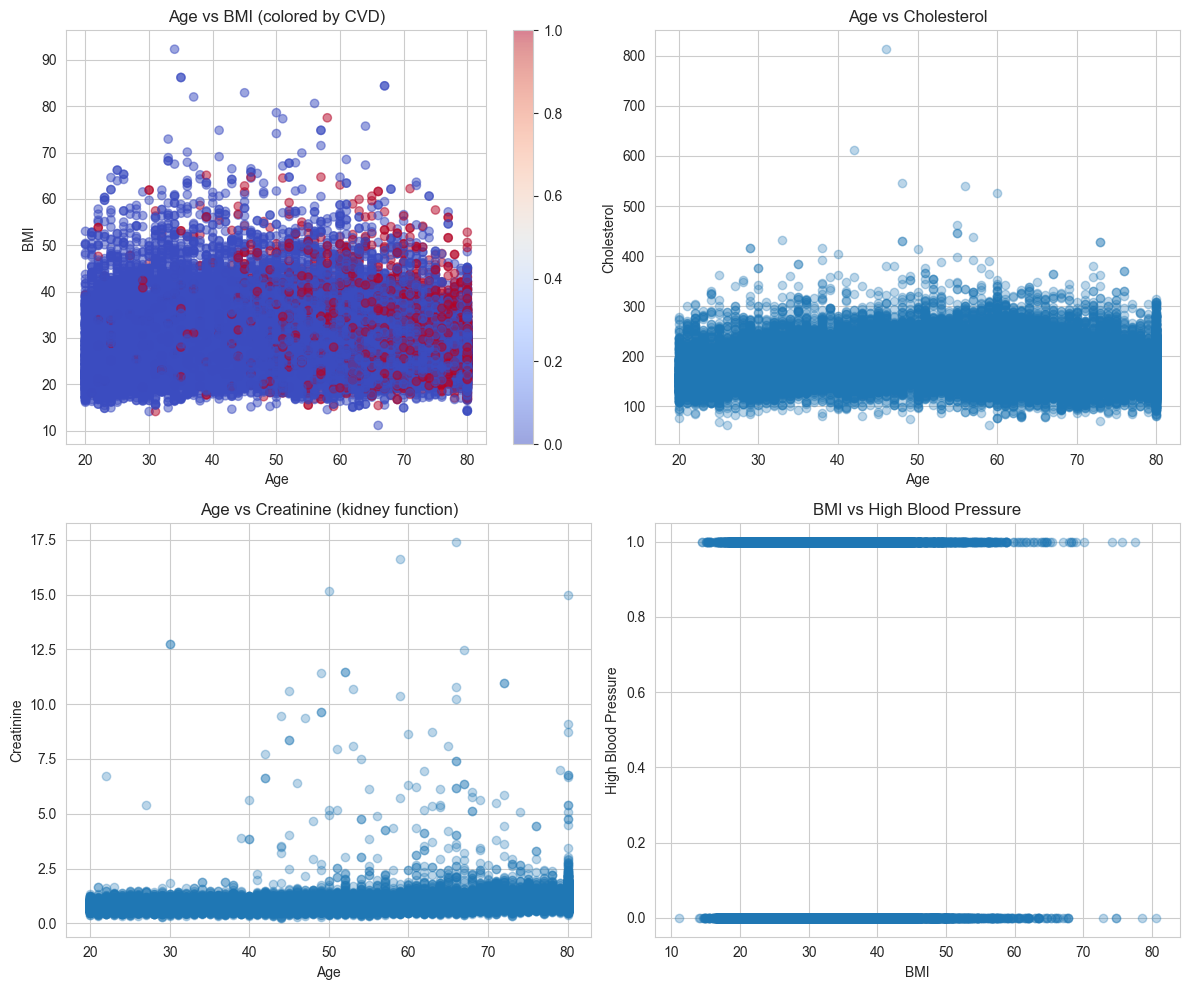

In [4]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age vs BMI (colored by cardiovascular disease)
ax1 = axes[0, 0]
cvd_data = df[['age', 'body_mass_index', 'has_cardiovascular_disease']].dropna()
scatter1 = ax1.scatter(cvd_data['age'], cvd_data['body_mass_index'], 
                       c=cvd_data['has_cardiovascular_disease'], cmap='coolwarm', alpha=0.5)
ax1.set_xlabel('Age')
ax1.set_ylabel('BMI')
ax1.set_title('Age vs BMI (colored by CVD)')
plt.colorbar(scatter1, ax=ax1)

# Cholesterol vs Age
ax2 = axes[0, 1]
chol_data = df[['age', 'cholesterol_mg_dl']].dropna()
ax2.scatter(chol_data['age'], chol_data['cholesterol_mg_dl'], alpha=0.3)
ax2.set_xlabel('Age')
ax2.set_ylabel('Cholesterol')
ax2.set_title('Age vs Cholesterol')

# Creatinine vs Age (kidney function)
ax3 = axes[1, 0]
kidney_data = df[['age', 'creatinine_mg_dl']].dropna()
ax3.scatter(kidney_data['age'], kidney_data['creatinine_mg_dl'], alpha=0.3)
ax3.set_xlabel('Age')
ax3.set_ylabel('Creatinine')
ax3.set_title('Age vs Creatinine (kidney function)')

# BMI vs Blood Pressure
ax4 = axes[1, 1]
bp_data = df[['body_mass_index', 'high_blood_pressure']].dropna()
ax4.scatter(bp_data['body_mass_index'], bp_data['high_blood_pressure'], alpha=0.3)
ax4.set_xlabel('BMI')
ax4.set_ylabel('High Blood Pressure')
ax4.set_title('BMI vs High Blood Pressure')

plt.tight_layout()
plt.show()

## 2. Pair Plots

Explore interactions between multiple variables

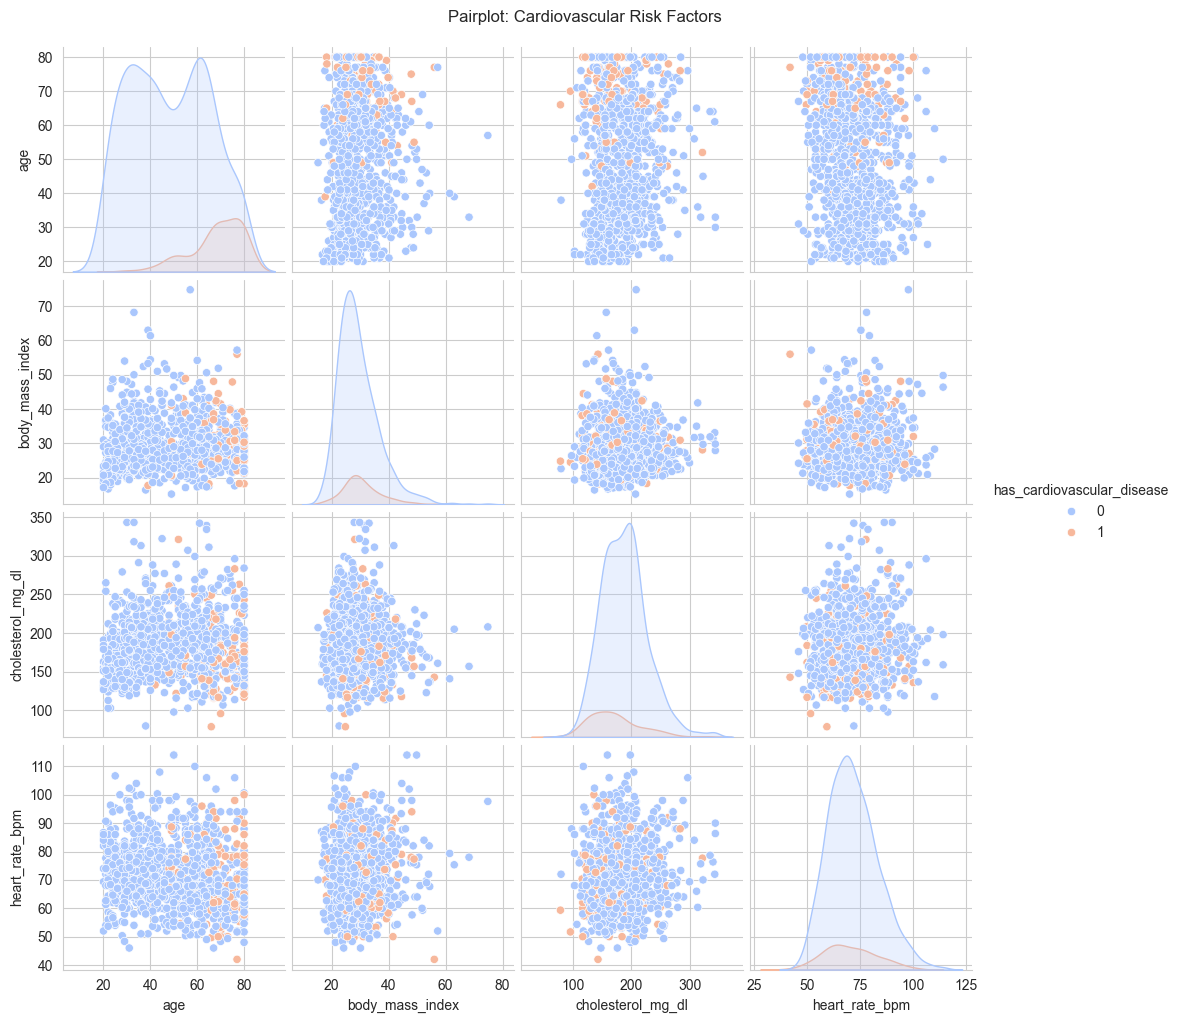

In [5]:
# Pair plot for key cardiovascular risk factors
key_features = ['age', 'body_mass_index', 'cholesterol_mg_dl', 'heart_rate_bpm', 'has_cardiovascular_disease']
pair_data = df[key_features].dropna().sample(n=min(1000, len(df)), random_state=42)

sns.pairplot(pair_data, hue='has_cardiovascular_disease', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot: Cardiovascular Risk Factors', y=1.02)
plt.show()

## 3. Summary

Key correlations and patterns identified

In [6]:
# Find top correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1.0]  # Remove self-correlations
top_corr = corr_pairs.abs().sort_values(ascending=False).head(10)

print('\u202aTop 10 Correlated Feature Pairs:\n')
for pair, corr in top_corr.items():
    print(f'\u202a{pair[0]:30} <-> {pair[1]:30} : {corr:.3f}')

‪Top 10 Correlated Feature Pairs:

‪liver_ggt_U_L                  <-> liver_ast_U_L                  : 0.416
‪liver_ast_U_L                  <-> liver_ggt_U_L                  : 0.416
‪height_cm                      <-> hemoglobin_g_dl                : 0.378
‪hemoglobin_g_dl                <-> height_cm                      : 0.378
‪platelets_count                <-> white_blood_cells_count        : 0.317
‪white_blood_cells_count        <-> platelets_count                : 0.317
‪uric_acid_mg_dl                <-> height_cm                      : 0.271
‪height_cm                      <-> uric_acid_mg_dl                : 0.271
‪uric_acid_mg_dl                <-> creatinine_mg_dl               : 0.266
‪creatinine_mg_dl               <-> uric_acid_mg_dl                : 0.266


In [7]:
# TODO: K-Means clustering
# Find optimal number of clusters (elbow method)
# inertia = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# plt.plot(range(2, 11), inertia, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

In [8]:
# TODO: Analyze feature distributions by target variable
# Example: Age distribution for patients with/without cardiovascular disease

In [9]:
# TODO: Document key findings:
# - Which features are highly correlated?
# - Are there distinct patient groups?
# - Which features are most important for each target?